In [1]:
import warnings
warnings.filterwarnings('ignore')

import ensemble_agent_var

created agent knn role std
created dataset of agent knn role std
created agent logistic role std
created dataset of agent logistic role std
created agent lda role std
created dataset of agent lda role std
created agent svm role std
created dataset of agent svm role std
created agent knn role magnet
created dataset of agent knn role magnet
created agent svm role magnet
created dataset of agent svm role magnet
created agent ridge role magnet
created dataset of agent ridge role magnet
created agent RandomForestClassifier Variation role ensemble


In [2]:
agent1=ensemble_agent_var.ensemble

#queste liste contengono i valori della metrica f1+confidenza per tutti gli agenti operativi multilabel a ogni iterazione
svm_agent_values=[]
knn_agent_values=[]
lda_agent_values=[]
logistic_agent_values=[]
#queste liste contengono i valori della metrica f1+confidenza per tutti gli agenti operativi multilclasse(magnete) a ogni iterazione
knnRUL_agent_values=[]
svmRUL_agent_values=[]
ridgeRUL_agent_values=[]

In [13]:
for i in range(1):
    #ciclo operativo degli ensemble e successivo salvataggio dei loro guadagni
    agent1.operative_cycle()
    #salvo i valori di metrica aumentata degli altri agenti operativi
    svm_agent_values.append(agent1.model_list[3].total_score)
    knn_agent_values.append(agent1.model_list[0].total_score)
    lda_agent_values.append(agent1.model_list[2].total_score)
    logistic_agent_values.append(agent1.model_list[1].total_score)
    knnRUL_agent_values.append(agent1.rul_model_list[0].total_score)
    svmRUL_agent_values.append(agent1.rul_model_list[1].total_score)
    ridgeRUL_agent_values.append(agent1.rul_model_list[2].total_score)

#da questi valori posso ricavare dei grafici che mostrano l'andamento delle performance piu rilevanti crossvalidate all aumentare dei campioni in arrivo
#si parte da 2*50*50 campioni iniziali incrementando ogni epoca fino alla 7 di 50*50
#i grafici dei savings sono dei progressivi non crossvalidati
#il total score è cross validato

prediction done knn role std epoch 4
prediction done logistic role std epoch 4
prediction done lda role std epoch 4
prediction done svm role std epoch 4
prediction done knn role magnet epoch 4
prediction done svm role magnet epoch 4
prediction done ridge role magnet epoch 4
prediction done RandomForestClassifier Variation role ensemble epoch 4


In [14]:
svm_agent_values

[0.402735253908409, 0.5856127115903408, 0.6627826551662499]

In [15]:
knn_agent_values

[0.32408872119814264, 0.43692969041431745, 0.47666690586534993]

In [16]:
lda_agent_values

[0.4675784815277437, 0.5590566065128979, 0.5673339424882442]

In [17]:
logistic_agent_values

[0.5, 0.6666666666666666, 0.7222222222222222]

In [18]:
knnRUL_agent_values

[0.5326027021376278, 0.5286189253434783, 0.5261852728249868]

In [19]:
svmRUL_agent_values

[0.5450581450596548, 0.5450439591261418, 0.5450497351754967]

In [20]:
ridgeRUL_agent_values

[0.5135197693623899, 0.5112721685034417, 0.5075147790022945]

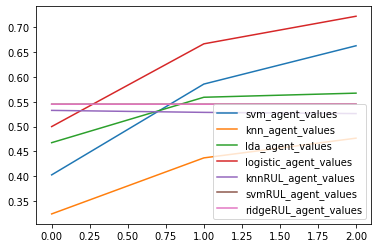

In [27]:
from matplotlib import pyplot as plt
plt.plot(svm_agent_values, label="svm_agent_values")
plt.plot(knn_agent_values, label="knn_agent_values")
plt.plot(lda_agent_values, label="lda_agent_values")
plt.plot(logistic_agent_values, label="logistic_agent_values")
plt.plot(knnRUL_agent_values, label="knnRUL_agent_values")
plt.plot(svmRUL_agent_values, label="svmRUL_agent_values")
plt.plot(svmRUL_agent_values, label="ridgeRUL_agent_values")

plt.legend()
plt.show()